In [142]:
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display
import librosa
import pandas as pd

In [6]:
DATASET_PATH = 'data/mini_speech_commands'

data_dir = pathlib.Path(DATASET_PATH)
if not data_dir.exists():
  tf.keras.utils.get_file(
      'mini_speech_commands.zip',
      origin="http://storage.googleapis.com/download.tensorflow.org/data/mini_speech_commands.zip",
      extract=True,
      cache_dir='.', cache_subdir='data')


In [8]:
commands = np.array(tf.io.gfile.listdir(str(data_dir)))
commands = commands[commands != 'README.md']
print('Commands:', commands)

Commands: ['down' 'go' 'left' 'no' 'right' 'stop' 'up' 'yes']


In [61]:
from pathlib import Path
audio_paths = []
labels = []
for label, name in enumerate(commands):
    print("Processing speaker {}".format(name,))
    dir_path = Path(DATASET_PATH) / name
    speaker_sample_paths = [
        os.path.join(dir_path, filepath)
        for filepath in os.listdir(dir_path)
        if filepath.endswith(".wav")
    ]
    audio_paths += speaker_sample_paths
    labels += [label] * len(speaker_sample_paths)

print(
    "Found {} files belonging to {} classes.".format(len(audio_paths), len(commands))
)

Processing speaker down
Processing speaker go
Processing speaker left
Processing speaker no
Processing speaker right
Processing speaker stop
Processing speaker up
Processing speaker yes
Found 8000 files belonging to 8 classes.


## Waveform

C:\Users\Abraham\AppData\Local\Temp\ipykernel_12792\3650925284.py:9: FutureWarning: Pass sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(y, sr, x_axis= None)


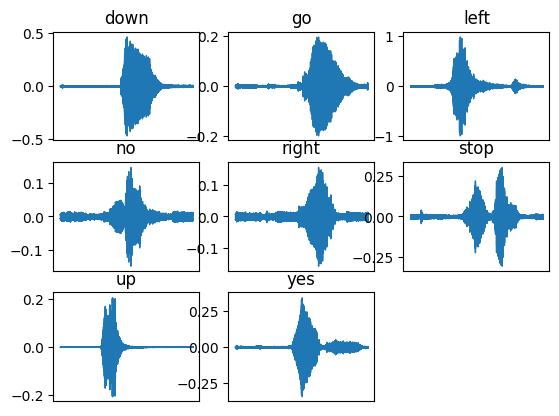

In [100]:
from librosa import display
r = 3
c = 3
x = 0
for i in range(len(commands)):
    plt.subplot(r,c,i+1)
    plt.title(commands[i])
    y, sr = librosa.load(audio_paths[x], sr = None)
    librosa.display.waveshow(y, sr, x_axis= None)
    x = x + 1000
    i = 1 + i

## Spectrogram

(1025, 32)


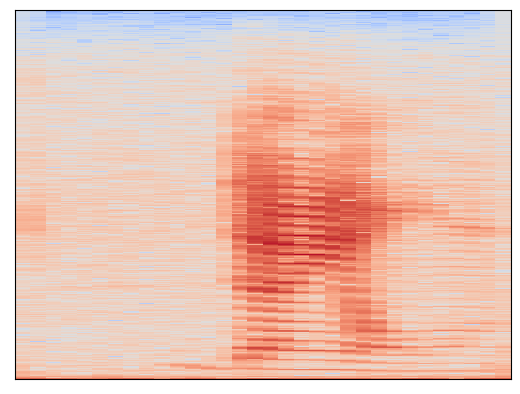

In [140]:
y, sr = librosa.load(audio_paths[0], sr = None)
stft = librosa.stft(y)
spec = librosa.power_to_db(np.abs(stft), ref=np.median)
librosa.display.specshow(spec)
print(spec.shape)

def get_spectogram(path):
    y, sr = librosa.load(path, sr=None)
    stft = librosa.stft(y)
    spec = librosa.power_to_db(np.abs(stft), ref=np.median)
    return spec

def plot_spectogram(path):
    spec = get_spectogram(path)
    return librosa.display.specshow(spec)

In [144]:
spec_ds= []
for path in audio_paths:
    spec = get_spectogram(path)
    for value in spec:
        to_append += f' {np.mean(value)}'
    stuff = list(map(float, to_append.split(" ")))
    entry = entry + stuff
    spec_ds.append(entry)

ValueError: could not convert string to float: ''

In [132]:
len(spec_ds)

8000

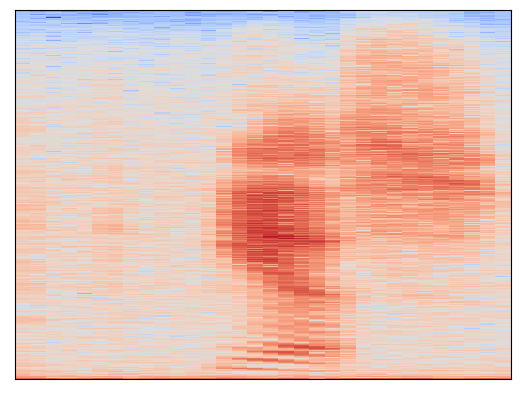

In [133]:
plot_spectogram(audio_paths[7000])

In [125]:
spec_ds[5000].shape

(1025, 32)